U ovom kodu smo koristili vestacko generisane slike tako sto smo  ImageDataGenerator. 
Klasa ImageDataGenerator u Kerasu omogućava različite tehnike augmentacije podataka, poput rotacije, skaliranja, horizontalnog i vertikalnog zrcaljenja, promene svetline i kontrasta, što pomaže u obogaćivanju skupa podataka i poboljšanju generalizacije modela.
Ovim smo pobosljali nas program i smajili val_loss koji je u proslom bio veci, a sada sveden na minimum. 

Sto se tice samih rezultata dosta su uspesni i odlicno predvidja slike. Jedino sto mozemo primetiti da model sporije uci kroz epohe u poredjenju sa programom bez vestacko generisanih slika. Preciznost je nakon 10 epoha bila 80% dok smo bez vestacko generisanih bilo 100%, ali smo zato sada smanjili gubitke.


In [1]:
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt

# Putanja do osnovnog direktorija dataset-a
koreni_dir = pathlib.Path('test')

# Definisanje parametara za obradu slika
batch_size = 32
visina_slike = 256
sirina_slike = 256

# Kreiranje ImageDataGenerator-a za trening set
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3)  # Dodat parametar za podelu podataka

# Kreiranje ImageDataGenerator-a za validacioni set
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3)  # Dodat parametar za podelu podataka

# Priprema skupa podataka za treniranje
train_ds = train_datagen.flow_from_directory(
    koreni_dir,
    target_size=(visina_slike, sirina_slike),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',  # Specifikacija da je ovo deo za treniranje
    seed=123)

# Priprema skupa podataka za validaciju
val_ds = validation_datagen.flow_from_directory(
    koreni_dir,
    target_size=(visina_slike, sirina_slike),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',  # Specifikacija da je ovo deo za validaciju
    seed=123)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_ds = test_datagen.flow_from_directory(
    koreni_dir,  
    target_size=(visina_slike, sirina_slike),
    batch_size=batch_size,  
    class_mode='binary', 
    subset=None,  
    shuffle=False,  
    seed=123) 

# Spremanje imena klasa
imena_klasa = list(train_ds.class_indices.keys())
print(imena_klasa)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(visina_slike, sirina_slike, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(imena_klasa))  
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

epohe = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epohe
)


2024-05-07 10:08:02.943377: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 10:08:03.438643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 10:08:03.438824: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 10:08:03.477937: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 10:08:03.625890: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 10:08:03.635708: I tensorflow/core/platform/cpu_feature_guard.cc:1

Found 1189 images belonging to 19 classes.
Found 494 images belonging to 19 classes.
Found 1683 images belonging to 19 classes.
['Enkelad', 'Evropa', 'Fobos', 'Ganimed', 'Jupiter', 'Kalisto', 'Mars', 'Merkur', 'Mesec', 'Mimant', 'Neptun', 'Reja', 'Saturn', 'Uran', 'Venera', 'Zemlja', 'deimos', 'io', 'titan']


2024-05-07 10:08:09.727026: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


Epoch 1/10
38/38 [==============================] - 43s 1s/step - loss: 1.9519 - accuracy: 0.3961 - val_loss: 1.4329 - val_accuracy: 0.5688
Epoch 2/10
38/38 [==============================] - 38s 997ms/step - loss: 1.1847 - accuracy: 0.6207 - val_loss: 1.1730 - val_accuracy: 0.6579
Epoch 3/10
38/38 [==============================] - 39s 1s/step - loss: 1.0953 - accuracy: 0.6375 - val_loss: 0.9298 - val_accuracy: 0.7348
Epoch 4/10
38/38 [==============================] - 39s 1s/step - loss: 0.8941 - accuracy: 0.6981 - val_loss: 0.9791 - val_accuracy: 0.6842
Epoch 5/10
38/38 [==============================] - 38s 995ms/step - loss: 0.7603 - accuracy: 0.7569 - val_loss: 0.7967 - val_accuracy: 0.7328
Epoch 6/10
38/38 [==============================] - 39s 1s/step - loss: 0.6601 - accuracy: 0.7881 - val_loss: 0.7067 - val_accuracy: 0.7449
Epoch 7/10
38/38 [==============================] - 35s 952ms/step - loss: 0.5865 - accuracy: 0.8082 - val_loss: 0.7226 - val_accuracy: 0.7591
Epoch 8/10


In [2]:
# Evaluacija modela na test skupu
gubitak, preciznost = model.evaluate(test_ds)
print("Preciznost na test skupu:", preciznost)
print("Gubitak na test skupu:", gubitak)

53/53 [==============================] - 12s 226ms/step - loss: 0.4237 - accuracy: 0.8390
Preciznost na test skupu: 0.8389779925346375
Gubitak na test skupu: 0.4236668050289154


Model se i na trening i na test skupu pokazao isto: tacnost mu je oko 80%, sto je zadovoljavajuce.

1/1 [==============================] - 0s 105ms/step


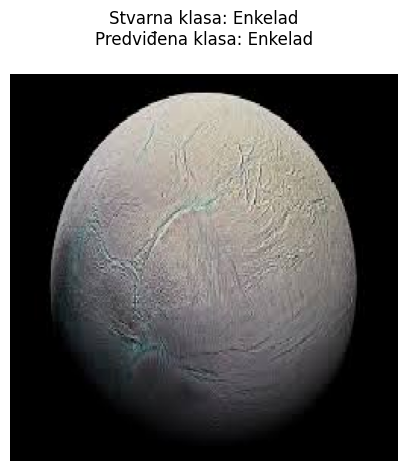

Stvarna klasa: Enkelad, Predviđena klasa: Enkelad
1/1 [==============================] - 0s 24ms/step


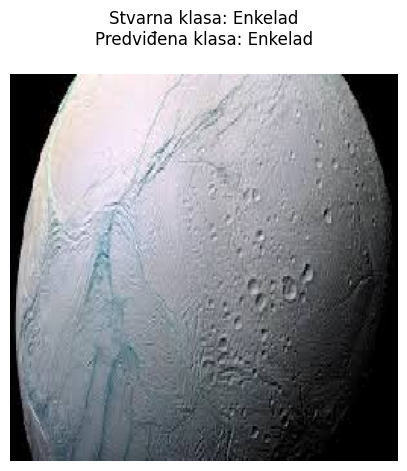

Stvarna klasa: Enkelad, Predviđena klasa: Enkelad
1/1 [==============================] - 0s 24ms/step


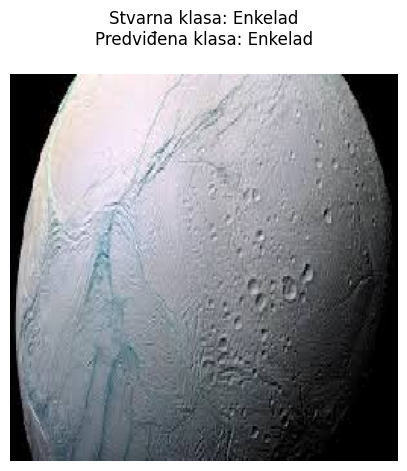

Stvarna klasa: Enkelad, Predviđena klasa: Enkelad
1/1 [==============================] - 0s 23ms/step


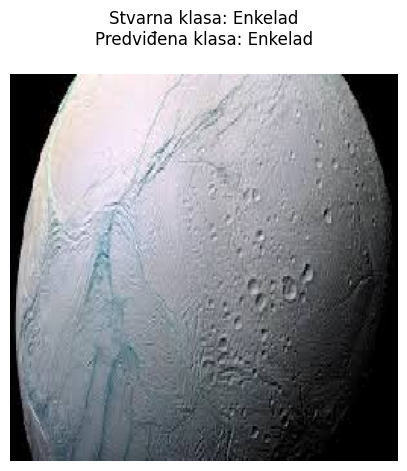

Stvarna klasa: Enkelad, Predviđena klasa: Enkelad
1/1 [==============================] - 0s 21ms/step


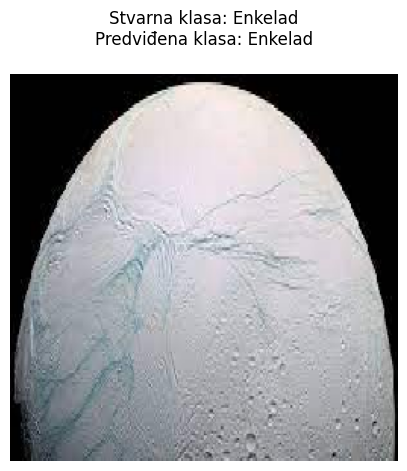

Stvarna klasa: Enkelad, Predviđena klasa: Enkelad
1/1 [==============================] - 0s 21ms/step


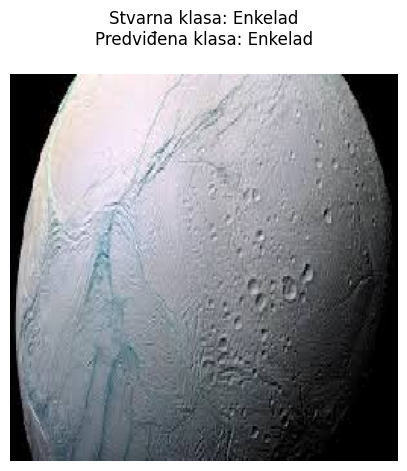

Stvarna klasa: Enkelad, Predviđena klasa: Enkelad
1/1 [==============================] - 0s 21ms/step


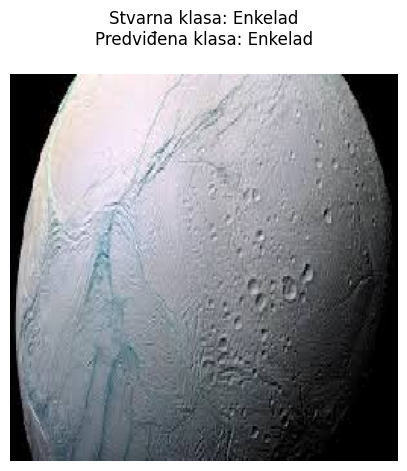

Stvarna klasa: Enkelad, Predviđena klasa: Enkelad
1/1 [==============================] - 0s 21ms/step


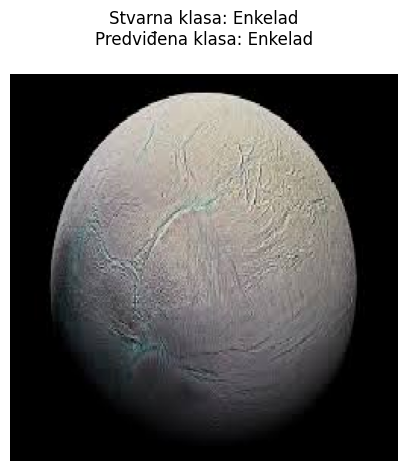

Stvarna klasa: Enkelad, Predviđena klasa: Enkelad
1/1 [==============================] - 0s 21ms/step


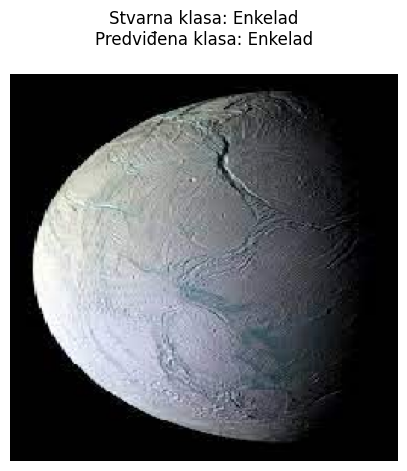

Stvarna klasa: Enkelad, Predviđena klasa: Enkelad
1/1 [==============================] - 0s 22ms/step


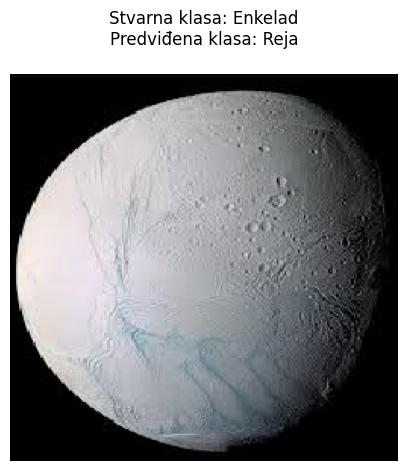

Stvarna klasa: Enkelad, Predviđena klasa: Reja
Procenat tačnosti: 90.00%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


tacne_predikcije = 0
ukupno_predikcija = 0


broj_slika_za_testiranje = 10

# Prikupljanje slika i labele iz testnog skupa
test_slike = []
test_oznake = []
brojac = 0
for slika, oznaka in test_ds:  
    for i in range(slika.shape[0]):  # Iteracija kroz sve slike u batch-u
        if brojac >= broj_slika_za_testiranje:
            break  # Prekida se kada se dostigne željeni broj slika
        test_slike.append(slika[i])
        test_oznake.append(oznaka[i])

        brojac += 1
    if brojac >= broj_slika_za_testiranje:
        break  # Takođe prekida spoljnu petlju

cvorovi = np.random.choice(range(len(test_slike)), 10, replace=True)


for i in cvorovi:
    img = test_slike[i]
    indeks = test_oznake[i]
    prava_oznaka = imena_klasa[int(indeks)]


    # Normalizacija slike za prikaz, ako je potrebno
    img_to_show = img
    if img_to_show.max() > 1.0:
        img_to_show = img_to_show / 255.0

    img_niz = np.expand_dims(img, axis=0)
    predikcija = model.predict(img_niz)
    indeks_predvidjene_klase = np.argmax(predikcija)
    predvidjena_klasa = imena_klasa[indeks_predvidjene_klase]

    # Provera da li je predviđena klasa tačna
    tacno = prava_oznaka == predvidjena_klasa
    if tacno:
        tacne_predikcije += 1
    ukupno_predikcija += 1

    plt.figure(figsize=(5, 6))
    plt.imshow(img_to_show)
    plt.title(f"Stvarna klasa: {prava_oznaka}\nPredviđena klasa: {predvidjena_klasa}\n")
    plt.axis('off')
    plt.show()

    print(f"Stvarna klasa: {prava_oznaka}, Predviđena klasa: {predvidjena_klasa}")

# Izračunavanje i prikazivanje procenta tačnosti
procenat_tacnosti = (tacne_predikcije / ukupno_predikcija) * 100
print(f"Procenat tačnosti: {procenat_tacnosti:.2f}%")

Funkcija *np.random.choice* je davala prednost jednoj od klasa, sto je problem hardvera ovog racunara, van trenutnog opsega znanja za resavanje, i nije predmet ovog projekta.

1/1 [==============================] - 0s 21ms/step


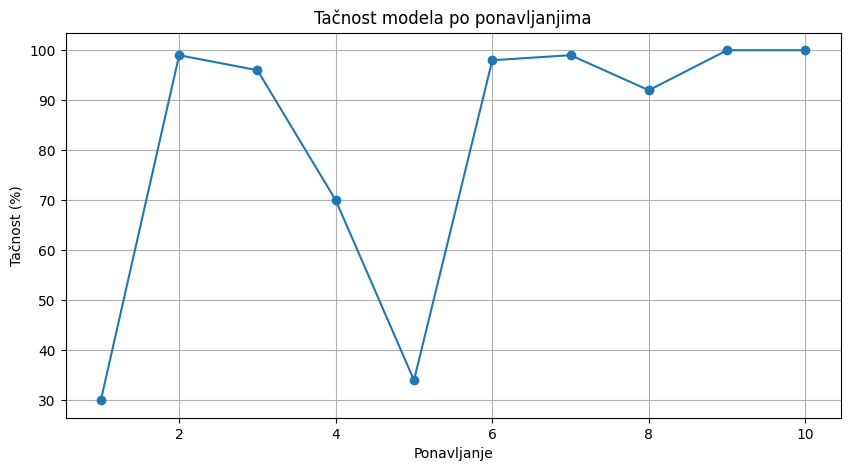

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definisanje parametara za testiranje
broj_pokusaja = 10
broj_slika_po_pokusaju = 100
tacnosti = []

# Glavna petlja za višestruko testiranje
for pokusaj in range(broj_pokusaja):
    tacne_predikcije = 0
    ukupno_predikcija = 0
    # Prikupljanje slika i oznaka iz testnog skupa
    test_slike = []
    test_oznake = []
    brojac = 0
    for slike, oznake in test_ds:  
        indeksi = np.random.choice(slike.shape[0], min(slike.shape[0], broj_slika_po_pokusaju), replace=False)
        for i in indeksi:
            test_slike.append(slike[i])
            test_oznake.append(oznake[i])
            brojac += 1
            if brojac >= broj_slika_po_pokusaju:
                break
        if brojac >= broj_slika_po_pokusaju:
            break

    # Provera predikcija modela za svaku sliku
    for i in range(broj_slika_po_pokusaju):
        img_niz = np.expand_dims(test_slike[i], axis=0)  # Pretvaranje slike u batch od jedne slike
        predikcija = model.predict(img_niz)
        indeks_predvidjene_klase = np.argmax(predikcija)
        prava_oznaka = test_oznake[i]
        if indeks_predvidjene_klase == prava_oznaka:
            tacne_predikcije += 1
        ukupno_predikcija += 1

    # Izračunavanje i čuvanje tačnosti za trenutno ponavljanje
    tacnost_pokusaja = (tacne_predikcije / ukupno_predikcija) * 100
    tacnosti.append(tacnost_pokusaja)

# Crtanje grafika tačnosti za svako ponavljanje
plt.figure(figsize=(10, 5))
plt.plot(range(1, broj_pokusaja + 1), tacnosti, marker='o')
plt.title('Tačnost modela po ponavljanjima')
plt.xlabel('Ponavljanje')
plt.ylabel('Tačnost (%)')
plt.grid(True)
plt.show()


# Zakljucak i uporedjivanje

## "Suvi" fajlovi

U svesci KlasifikacijaSvihZajedno.ipynb je demonstrirana upotreba modela na bazi podataka koja nije ni na koji nacin prosirivana, i nasuprot ocekivanjima, model je pokazao relativno visoku preciznost od oko 80% na test skupu.  

Kod ponovljenih testiranja, model se pokazao konzistentan i stabilan.

Taj pristup imao je dva problema: prvi je bio preprilagodjavanje, jer je na trening skupu preciznost bila skoro 100%, a drugi je bio ogroman gubitak. 

Jedan od nacina za resavanje tih problema je bilo koriscenje augmentovane baze podataka.

## Augmentovana baza

U ovoj svesci, kao i u svesci Klasifikacija planeta i satelita - drugi deo, koriscena je klasa ImageDataGenerator kao alat za augmentaciju vec postojece baze podataka.

U odnosu na prethodni pristup, gubitak je sveden na minimum - sa 257 na 0.5 je odlicno poboljsanje.

Preciznost na trening skupu mozda jeste manja, ali je sposobnost generalizacije znacajno unapredjena, sto se moze videti i u ponovljenim testiranjima, gde je model pokazao mogucnost i da ima apsolutnu tacnost, naustrb konzistentnosti.

In [11]:
print(test_ds.labels)

[ 0  0  0 ... 18 18 18]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Priprema podataka za matricu konfuzije
y_true = []
y_pred = []

# Predviđanje klasa za sve slike iz test generatora
for slike, oznake in test_ds:
    pred = model.predict(slike)
    pred_classes = np.argmax(pred, axis=1)
    y_true.extend(oznake)
    y_pred.extend(pred_classes)

# Kreiranje matrice konfuzije
matrica_konfuzije = confusion_matrix(y_true, y_pred)

# Kreiranje DataFrame-a za matricu konfuzije
matrica_df = pd.DataFrame(matrica_konfuzije, index=imena_klasa, columns=imena_klasa)

# Prikaz matrice konfuzije 
plt.figure(figsize=(10, 7))
sns.heatmap(matrica_df, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predviđena klasa')
plt.ylabel('Stvarna klasa')
plt.title('Matrica konfuzije')
plt.show()

1/1 [==============================] - 0s 158ms/step
